<a href="https://colab.research.google.com/github/OmarFarukNoman/Into-to-Machine-Learning/blob/main/Homework-4/Problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


SVR - LINEAR Kernel:
Train MSE: 1,682,219,337,634.88
Val MSE:   2,511,684,463,458.80

SVR - POLY Kernel:
Train MSE: 1,683,389,133,527.60
Val MSE:   2,513,387,965,932.74

SVR - RBF Kernel:
Train MSE: 1,683,405,847,958.08
Val MSE:   2,513,396,615,256.39

SVR - SIGMOID Kernel:
Train MSE: 1,683,350,312,876.35
Val MSE:   2,513,316,475,537.65

Linear Regression:
Train MSE: 516,566,413,246.40
Val MSE:   814,440,474,879.87

Comparison between SVR with different kernels vs Linear Regression

Model                Train MSE       Validation MSE 
----------------------------------------------------------------------
Linear Regression    516,566,413,246.40 814,440,474,879.87
SVR-LINEAR           1,682,219,337,634.88 2,511,684,463,458.80
SVR-POLY             1,683,389,133,527.60 2,513,387,965,932.74
SVR-RBF              1,683,405,847,958.08 2,513,396,615,256.39
SVR-SIGMOID          1,683,350,312,876.35 2,513,316,475,537.65


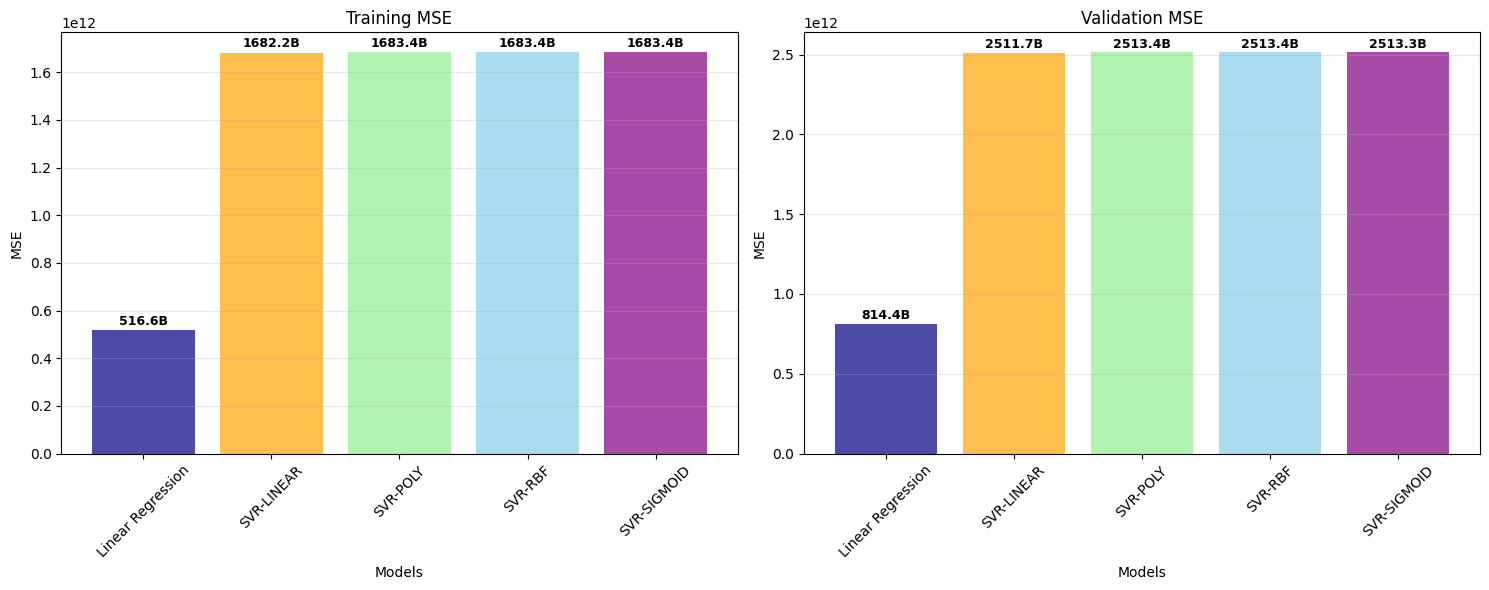

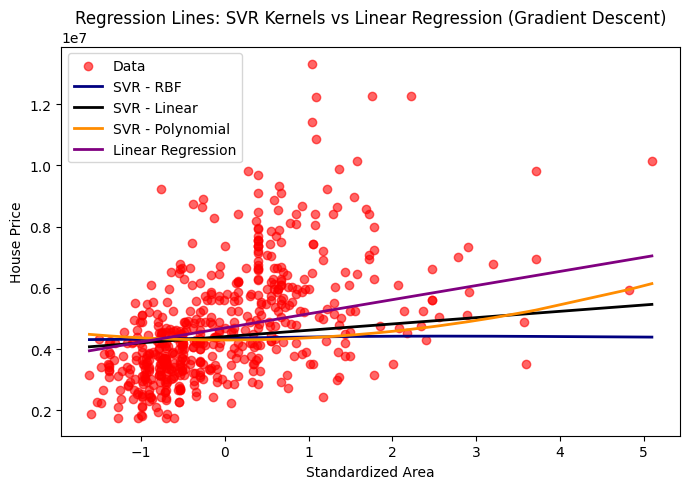

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# For this problem, we're using the housing dataset
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv"
h_data = pd.read_csv(url)

# I've separated the features and target
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
           'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

X_in = h_data[features].copy()
y_out = h_data['price'].values.reshape(-1, 1)

# I've converted categorical values to numerical
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in categorical_cols:
    X_in[col] = X_in[col].map({'yes': 1, 'no': 0})

X_in = X_in.values

# I've splited the dataset
X_train, X_val, y_train, y_val = train_test_split(X_in, y_out, test_size=0.2, random_state=80)

# I've used standardization and normalization
def standardize_features(X_train, X_val):
    X_mean = X_train.mean(axis=0)
    X_std = X_train.std(axis=0)
    X_std[X_std == 0] = 1  # Avoid division by zero
    X_train_std = (X_train - X_mean) / X_std
    X_val_std = (X_val - X_mean) / X_std
    return X_train_std, X_val_std


X_train_std, X_val_std = standardize_features(X_train, X_val)

# Data for SVR
X_train_svr = X_train_std
X_val_svr = X_val_std
y_train_svr = y_train.ravel()
y_val_svr = y_val.ravel()

# SVR models with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svr_mse_results = {}

for kernel in kernels:
    if kernel == 'poly':
        svr = SVR(kernel=kernel, C=1, degree=3)
    else:
        svr = SVR(kernel=kernel, C=1)

    svr.fit(X_train_svr, y_train_svr)

    # Predictions
    y_train_pred_svr = svr.predict(X_train_svr)
    y_val_pred_svr = svr.predict(X_val_svr)

    # MSE
    train_mse = mean_squared_error(y_train_svr, y_train_pred_svr)/2
    val_mse = mean_squared_error(y_val_svr, y_val_pred_svr)/2

    # Store results
    svr_mse_results[kernel] = {
        'train_mse': train_mse,
        'val_mse': val_mse
    }

    print(f"\nSVR - {kernel.upper()} Kernel:")
    print(f"Train MSE: {train_mse:,.2f}")
    print(f"Val MSE:   {val_mse:,.2f}")

# Gradient descent with regularization
def gradient_descent_regularized(X_in, y_out, X_val, y_val, learning_rate, max_iterations, lambda_reg):
    m, n = X_in.shape
    X_b = np.c_[np.ones((m, 1)), X_in]
    m_val = X_val.shape[0]
    X_val_b = np.c_[np.ones((m_val, 1)), X_val]

    theta = np.zeros((n + 1, 1))
    train_losses = []
    val_losses = []

    for iteration in range(max_iterations):
        predictions = X_b @ theta
        gradients = (1/m) * X_b.T @ (predictions - y_out)
        gradients[1:] = gradients[1:] + (lambda_reg/m) * theta[1:]
        theta -= learning_rate * gradients

        # Training loss with regularization
        mse_loss = (1/(2*m)) * np.sum((predictions - y_out)**2)
        reg_loss = (lambda_reg/(2*m)) * np.sum(theta[1:]**2)
        train_loss = mse_loss + reg_loss

        # Validation loss
        val_predictions = X_val_b @ theta
        val_loss = (1/(2*m_val)) * np.sum((val_predictions - y_val)**2)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return theta, train_losses, val_losses


X_train_std_scaler = X_train_std
X_val_std_scaler = X_val_std

# Train Linear Regression
learning_rate = 0.01
max_iterations = 1000
lambda_reg = 1.5

theta_std_reg, train_losses_std_reg, val_losses_std_reg = gradient_descent_regularized(
    X_train_std_scaler, y_train, X_val_std_scaler, y_val, learning_rate, max_iterations, lambda_reg
)

# Make predictions with linear regression
X_train_b_std = np.c_[np.ones((X_train_std_scaler.shape[0], 1)), X_train_std_scaler]
X_val_b_std = np.c_[np.ones((X_val_std_scaler.shape[0], 1)), X_val_std_scaler]

y_train_pred_lr = X_train_b_std @ theta_std_reg
y_val_pred_lr = X_val_b_std @ theta_std_reg

# MSE for linear regression
lr_train_mse = mean_squared_error(y_train, y_train_pred_lr)/2
lr_val_mse = mean_squared_error(y_val, y_val_pred_lr)/2

print(f"\nLinear Regression:")
print(f"Train MSE: {lr_train_mse:,.2f}")
print(f"Val MSE:   {lr_val_mse:,.2f}")

# Create comparison table
print("\nComparison between SVR with different kernels vs Linear Regression")
print(f"\n{'Model':<20} {'Train MSE':<15} {'Validation MSE':<15}")
print("-"*70)
print(f"{'Linear Regression':<20} {lr_train_mse:<15,.2f} {lr_val_mse:<15,.2f}")
for kernel in kernels:
    print(f"{'SVR-'+kernel.upper():<20} {svr_mse_results[kernel]['train_mse']:<15,.2f} {svr_mse_results[kernel]['val_mse']:<15,.2f}")

# Plot MSE comparison
models = ['Linear Regression'] + [f'SVR-{kernel.upper()}' for kernel in kernels]
train_mse_scores = [lr_train_mse] + [svr_mse_results[kernel]['train_mse'] for kernel in kernels]
val_mse_scores = [lr_val_mse] + [svr_mse_results[kernel]['val_mse'] for kernel in kernels]

# Create bar plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Training MSE
bars1 = ax1.bar(models, train_mse_scores, color=['Navy', 'Orange', 'lightgreen', 'skyblue', 'purple'], alpha=0.7)
ax1.set_xlabel('Models')
ax1.set_ylabel('MSE')
ax1.set_title('Training MSE')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3, axis='y')
for bar, value in zip(bars1, train_mse_scores):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1e10,
             f'{value/1e9:.1f}B', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Validation MSE
bars2 = ax2.bar(models, val_mse_scores, color=['Navy', 'Orange', 'lightgreen', 'skyblue', 'purple'], alpha=0.7)
ax2.set_xlabel('Models')
ax2.set_ylabel('MSE')
ax2.set_title('Validation MSE')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3, axis='y')
for bar, value in zip(bars2, val_mse_scores):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1e10,
             f'{value/1e9:.1f}B', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

# Linear Regression Lines for One Feature. SInce we cannot see all 11 features, I tried to show regression line for one feature.
# Extract one feature (area) for visualization
X_feature = h_data['area'].values.reshape(-1, 1)
y_target = h_data['price'].values.ravel()

# Standardize this feature (same as SVR)
scaler = StandardScaler()
X_feature_scaled = scaler.fit_transform(X_feature)

# SVR Models
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)


y_rbf = svr_rbf.fit(X_feature_scaled, y_target).predict(X_feature_scaled)
y_lin = svr_lin.fit(X_feature_scaled, y_target).predict(X_feature_scaled)
y_poly = svr_poly.fit(X_feature_scaled, y_target).predict(X_feature_scaled)

# Assume 'area' is the first feature (column index 0)
theta_0 = theta_std_reg[0][0]      # intercept term
theta_area = theta_std_reg[1][0]   # coefficient for 'area'

# Predict prices using only 'area' and the existing theta
y_lr = theta_0 + theta_area * X_feature_scaled


sort_idx = np.argsort(X_feature_scaled[:, 0])
X_sorted = X_feature_scaled[sort_idx]
y_target_sorted = y_target[sort_idx]
y_rbf = y_rbf[sort_idx]
y_lin = y_lin[sort_idx]
y_poly = y_poly[sort_idx]
y_lr = y_lr[sort_idx]

# Plot all regression lines
plt.figure(figsize=(7, 5))
plt.scatter(X_sorted, y_target_sorted, color='red', label='Data', alpha=0.6)
plt.plot(X_sorted, y_rbf, color='navy', lw=2, label='SVR - RBF')
plt.plot(X_sorted, y_lin, color='black', lw=2, label='SVR - Linear')
plt.plot(X_sorted, y_poly, color='darkorange', lw=2, label='SVR - Polynomial')
plt.plot(X_sorted, y_lr, color='purple', lw=2, label='Linear Regression')
plt.xlabel('Standardized Area')
plt.ylabel('House Price')
plt.title('Regression Lines: SVR Kernels vs Linear Regression (Gradient Descent)')
plt.legend()
plt.tight_layout()
plt.show()




SVR - LINEAR Kernel:
Train MSE: 1,578,150,299,019.60
Val MSE:   2,368,775,413,126.23

SVR - POLY Kernel:
Train MSE: 1,677,417,369,842.25
Val MSE:   2,506,166,579,988.61

SVR - RBF Kernel:
Train MSE: 1,679,086,093,958.69
Val MSE:   2,507,030,928,610.95

SVR - SIGMOID Kernel:
Train MSE: 1,673,554,633,160.53
Val MSE:   2,499,044,152,967.12

Linear Regression:
Train MSE: 516,566,413,246.40
Val MSE:   814,440,474,879.87

Comparison between SVR with different kernels vs Linear Regression

Model                Train MSE       Validation MSE 
----------------------------------------------------------------------
Linear Regression    516,566,413,246.40 814,440,474,879.87
SVR-LINEAR           1,578,150,299,019.60 2,368,775,413,126.23
SVR-POLY             1,677,417,369,842.25 2,506,166,579,988.61
SVR-RBF              1,679,086,093,958.69 2,507,030,928,610.95
SVR-SIGMOID          1,673,554,633,160.53 2,499,044,152,967.12


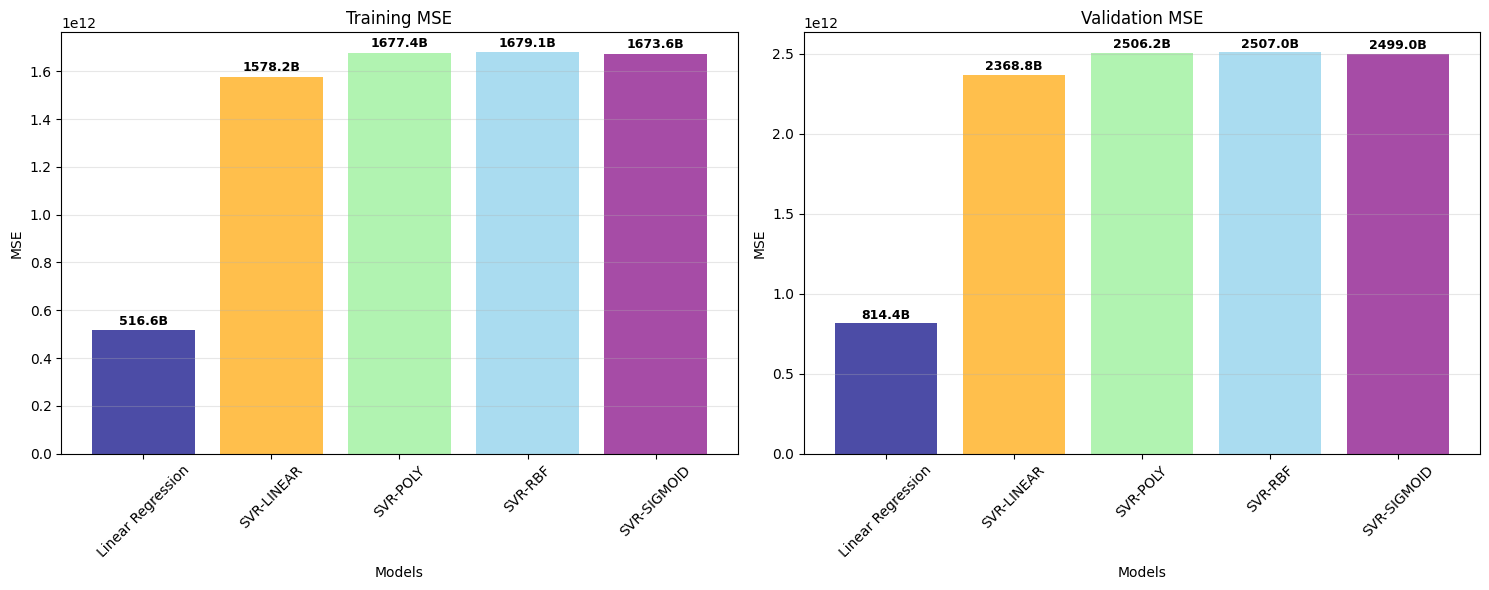

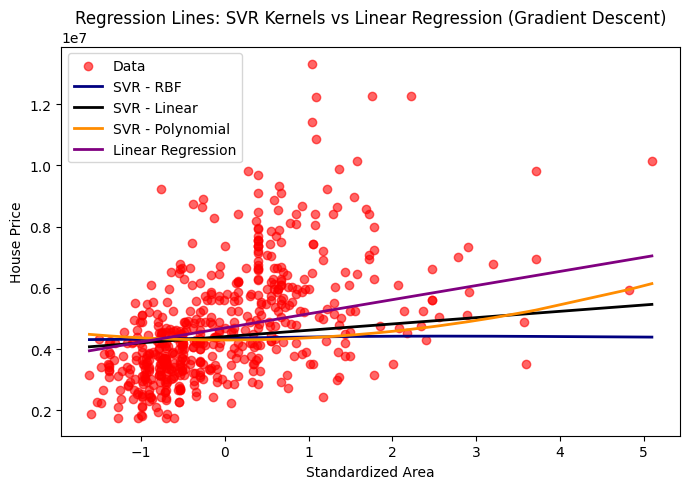

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# For this problem, we're using the housing dataset
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv"
h_data = pd.read_csv(url)

# I've separated the features and target
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
           'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

X_in = h_data[features].copy()
y_out = h_data['price'].values.reshape(-1, 1)

# I've converted categorical values to numerical
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in categorical_cols:
    X_in[col] = X_in[col].map({'yes': 1, 'no': 0})

X_in = X_in.values

# I've splited the dataset
X_train, X_val, y_train, y_val = train_test_split(X_in, y_out, test_size=0.2, random_state=80)

# I've used standardization and normalization
def standardize_features(X_train, X_val):
    X_mean = X_train.mean(axis=0)
    X_std = X_train.std(axis=0)
    X_std[X_std == 0] = 1  # Avoid division by zero
    X_train_std = (X_train - X_mean) / X_std
    X_val_std = (X_val - X_mean) / X_std
    return X_train_std, X_val_std


X_train_std, X_val_std = standardize_features(X_train, X_val)

# Data for SVR
X_train_svr = X_train_std
X_val_svr = X_val_std
y_train_svr = y_train.ravel()
y_val_svr = y_val.ravel()

# SVR models with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svr_mse_results = {}

for kernel in kernels:
    if kernel == 'poly':
        svr = SVR(kernel=kernel, C=100, degree=3)
    else:
        svr = SVR(kernel=kernel, C=100)

    svr.fit(X_train_svr, y_train_svr)

    # Predictions
    y_train_pred_svr = svr.predict(X_train_svr)
    y_val_pred_svr = svr.predict(X_val_svr)

    # MSE
    train_mse = mean_squared_error(y_train_svr, y_train_pred_svr)/2
    val_mse = mean_squared_error(y_val_svr, y_val_pred_svr)/2

    # Store results
    svr_mse_results[kernel] = {
        'train_mse': train_mse,
        'val_mse': val_mse
    }

    print(f"\nSVR - {kernel.upper()} Kernel:")
    print(f"Train MSE: {train_mse:,.2f}")
    print(f"Val MSE:   {val_mse:,.2f}")

# Gradient descent with regularization
def gradient_descent_regularized(X_in, y_out, X_val, y_val, learning_rate, max_iterations, lambda_reg):
    m, n = X_in.shape
    X_b = np.c_[np.ones((m, 1)), X_in]
    m_val = X_val.shape[0]
    X_val_b = np.c_[np.ones((m_val, 1)), X_val]

    theta = np.zeros((n + 1, 1))
    train_losses = []
    val_losses = []

    for iteration in range(max_iterations):
        predictions = X_b @ theta
        gradients = (1/m) * X_b.T @ (predictions - y_out)
        gradients[1:] = gradients[1:] + (lambda_reg/m) * theta[1:]
        theta -= learning_rate * gradients

        # Training loss with regularization
        mse_loss = (1/(2*m)) * np.sum((predictions - y_out)**2)
        reg_loss = (lambda_reg/(2*m)) * np.sum(theta[1:]**2)
        train_loss = mse_loss + reg_loss

        # Validation loss
        val_predictions = X_val_b @ theta
        val_loss = (1/(2*m_val)) * np.sum((val_predictions - y_val)**2)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return theta, train_losses, val_losses


X_train_std_scaler = X_train_std
X_val_std_scaler = X_val_std

# Train Linear Regression
learning_rate = 0.01
max_iterations = 1000
lambda_reg = 1.5

theta_std_reg, train_losses_std_reg, val_losses_std_reg = gradient_descent_regularized(
    X_train_std_scaler, y_train, X_val_std_scaler, y_val, learning_rate, max_iterations, lambda_reg
)

# Make predictions with linear regression
X_train_b_std = np.c_[np.ones((X_train_std_scaler.shape[0], 1)), X_train_std_scaler]
X_val_b_std = np.c_[np.ones((X_val_std_scaler.shape[0], 1)), X_val_std_scaler]

y_train_pred_lr = X_train_b_std @ theta_std_reg
y_val_pred_lr = X_val_b_std @ theta_std_reg

# MSE for linear regression
lr_train_mse = mean_squared_error(y_train, y_train_pred_lr)/2
lr_val_mse = mean_squared_error(y_val, y_val_pred_lr)/2

print(f"\nLinear Regression:")
print(f"Train MSE: {lr_train_mse:,.2f}")
print(f"Val MSE:   {lr_val_mse:,.2f}")

# Create comparison table
print("\nComparison between SVR with different kernels vs Linear Regression")
print(f"\n{'Model':<20} {'Train MSE':<15} {'Validation MSE':<15}")
print("-"*70)
print(f"{'Linear Regression':<20} {lr_train_mse:<15,.2f} {lr_val_mse:<15,.2f}")
for kernel in kernels:
    print(f"{'SVR-'+kernel.upper():<20} {svr_mse_results[kernel]['train_mse']:<15,.2f} {svr_mse_results[kernel]['val_mse']:<15,.2f}")

# Plot MSE comparison
models = ['Linear Regression'] + [f'SVR-{kernel.upper()}' for kernel in kernels]
train_mse_scores = [lr_train_mse] + [svr_mse_results[kernel]['train_mse'] for kernel in kernels]
val_mse_scores = [lr_val_mse] + [svr_mse_results[kernel]['val_mse'] for kernel in kernels]

# Create bar plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Training MSE
bars1 = ax1.bar(models, train_mse_scores, color=['Navy', 'Orange', 'lightgreen', 'skyblue', 'purple'], alpha=0.7)
ax1.set_xlabel('Models')
ax1.set_ylabel('MSE')
ax1.set_title('Training MSE')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3, axis='y')
for bar, value in zip(bars1, train_mse_scores):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1e10,
             f'{value/1e9:.1f}B', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Validation MSE
bars2 = ax2.bar(models, val_mse_scores, color=['Navy', 'Orange', 'lightgreen', 'skyblue', 'purple'], alpha=0.7)
ax2.set_xlabel('Models')
ax2.set_ylabel('MSE')
ax2.set_title('Validation MSE')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3, axis='y')
for bar, value in zip(bars2, val_mse_scores):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1e10,
             f'{value/1e9:.1f}B', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()


# Linear Regression Lines for One Feature. SInce we cannot see all 11 features, I tried to show regression line for one feature.
# Extract one feature (area) for visualization
X_feature = h_data['area'].values.reshape(-1, 1)
y_target = h_data['price'].values.ravel()

# Standardize this feature (same as SVR)
scaler = StandardScaler()
X_feature_scaled = scaler.fit_transform(X_feature)

# SVR Models
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)


y_rbf = svr_rbf.fit(X_feature_scaled, y_target).predict(X_feature_scaled)
y_lin = svr_lin.fit(X_feature_scaled, y_target).predict(X_feature_scaled)
y_poly = svr_poly.fit(X_feature_scaled, y_target).predict(X_feature_scaled)

# Assume 'area' is the first feature (column index 0)
theta_0 = theta_std_reg[0][0]      # intercept term
theta_area = theta_std_reg[1][0]   # coefficient for 'area'

# Predict prices using only 'area' and the existing theta
y_lr = theta_0 + theta_area * X_feature_scaled


sort_idx = np.argsort(X_feature_scaled[:, 0])
X_sorted = X_feature_scaled[sort_idx]
y_target_sorted = y_target[sort_idx]
y_rbf = y_rbf[sort_idx]
y_lin = y_lin[sort_idx]
y_poly = y_poly[sort_idx]
y_lr = y_lr[sort_idx]

# Plot all regression lines
plt.figure(figsize=(7, 5))
plt.scatter(X_sorted, y_target_sorted, color='red', label='Data', alpha=0.6)
plt.plot(X_sorted, y_rbf, color='navy', lw=2, label='SVR - RBF')
plt.plot(X_sorted, y_lin, color='black', lw=2, label='SVR - Linear')
plt.plot(X_sorted, y_poly, color='darkorange', lw=2, label='SVR - Polynomial')
plt.plot(X_sorted, y_lr, color='purple', lw=2, label='Linear Regression')
plt.xlabel('Standardized Area')
plt.ylabel('House Price')
plt.title('Regression Lines: SVR Kernels vs Linear Regression (Gradient Descent)')
plt.legend()
plt.tight_layout()
plt.show()



SVR - LINEAR Kernel:
Train MSE: 1,683,326,497,796.15
Val MSE:   2,513,283,299,765.70

SVR - POLY Kernel:
Train MSE: 1,683,443,517,439.27
Val MSE:   2,513,453,698,254.10

SVR - RBF Kernel:
Train MSE: 1,683,445,188,907.03
Val MSE:   2,513,454,563,191.77

SVR - SIGMOID Kernel:
Train MSE: 1,683,439,635,198.43
Val MSE:   2,513,446,548,972.66

Linear Regression:
Train MSE: 516,566,413,246.40
Val MSE:   814,440,474,879.87

Comparison between SVR with different kernels vs Linear Regression

Model                Train MSE       Validation MSE 
----------------------------------------------------------------------
Linear Regression    516,566,413,246.40 814,440,474,879.87
SVR-LINEAR           1,683,326,497,796.15 2,513,283,299,765.70
SVR-POLY             1,683,443,517,439.27 2,513,453,698,254.10
SVR-RBF              1,683,445,188,907.03 2,513,454,563,191.77
SVR-SIGMOID          1,683,439,635,198.43 2,513,446,548,972.66


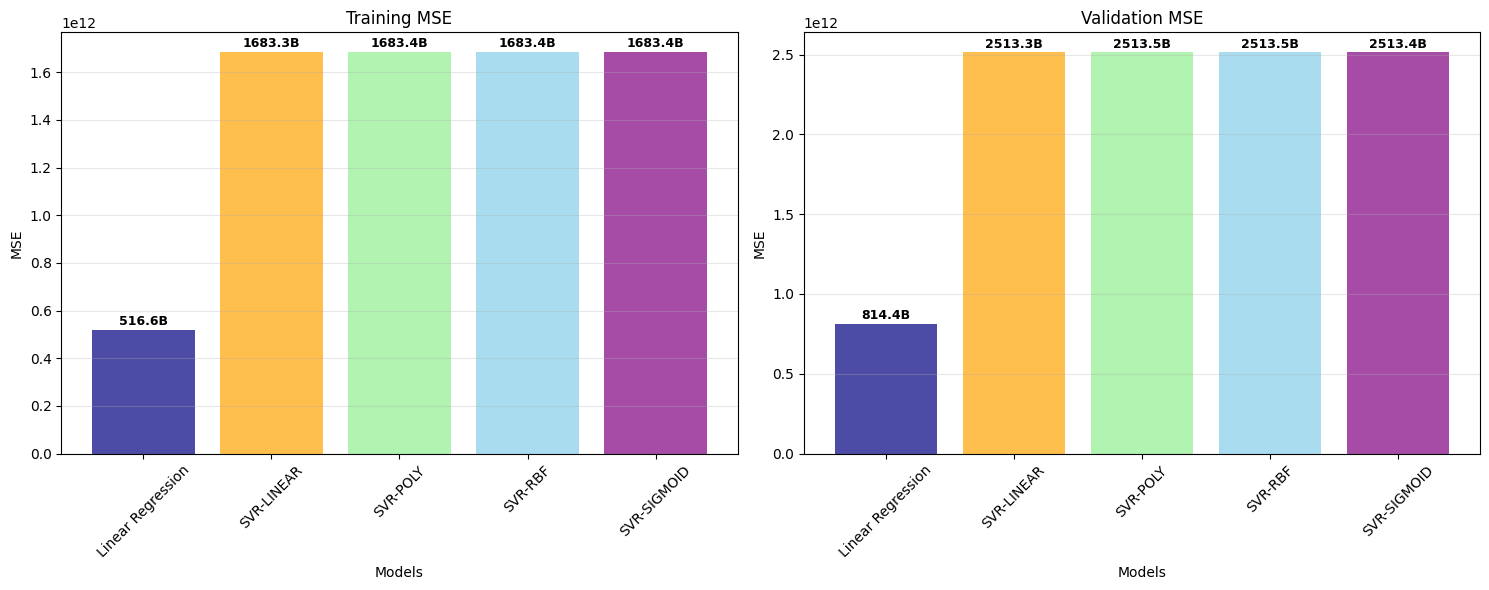

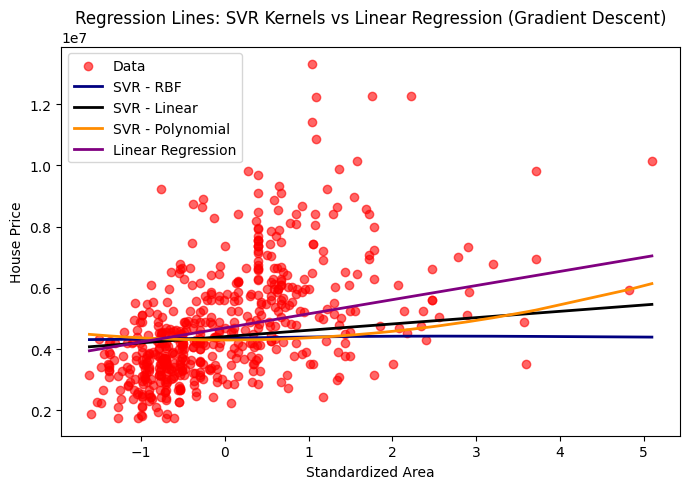

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# For this problem, we're using the housing dataset
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv"
h_data = pd.read_csv(url)

# I've separated the features and target
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
           'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

X_in = h_data[features].copy()
y_out = h_data['price'].values.reshape(-1, 1)

# I've converted categorical values to numerical
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in categorical_cols:
    X_in[col] = X_in[col].map({'yes': 1, 'no': 0})

X_in = X_in.values

# I've splited the dataset
X_train, X_val, y_train, y_val = train_test_split(X_in, y_out, test_size=0.2, random_state=80)

# I've used standardization and normalization
def standardize_features(X_train, X_val):
    X_mean = X_train.mean(axis=0)
    X_std = X_train.std(axis=0)
    X_std[X_std == 0] = 1  # Avoid division by zero
    X_train_std = (X_train - X_mean) / X_std
    X_val_std = (X_val - X_mean) / X_std
    return X_train_std, X_val_std


X_train_std, X_val_std = standardize_features(X_train, X_val)

# Data for SVR
X_train_svr = X_train_std
X_val_svr = X_val_std
y_train_svr = y_train.ravel()
y_val_svr = y_val.ravel()

# SVR models with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svr_mse_results = {}

for kernel in kernels:
    if kernel == 'poly':
        svr = SVR(kernel=kernel, C=0.1, degree=3)
    else:
        svr = SVR(kernel=kernel, C=0.1)

    svr.fit(X_train_svr, y_train_svr)

    # Predictions
    y_train_pred_svr = svr.predict(X_train_svr)
    y_val_pred_svr = svr.predict(X_val_svr)

    # MSE
    train_mse = mean_squared_error(y_train_svr, y_train_pred_svr)/2
    val_mse = mean_squared_error(y_val_svr, y_val_pred_svr)/2

    # Store results
    svr_mse_results[kernel] = {
        'train_mse': train_mse,
        'val_mse': val_mse
    }

    print(f"\nSVR - {kernel.upper()} Kernel:")
    print(f"Train MSE: {train_mse:,.2f}")
    print(f"Val MSE:   {val_mse:,.2f}")

# Gradient descent with regularization
def gradient_descent_regularized(X_in, y_out, X_val, y_val, learning_rate, max_iterations, lambda_reg):
    m, n = X_in.shape
    X_b = np.c_[np.ones((m, 1)), X_in]
    m_val = X_val.shape[0]
    X_val_b = np.c_[np.ones((m_val, 1)), X_val]

    theta = np.zeros((n + 1, 1))
    train_losses = []
    val_losses = []

    for iteration in range(max_iterations):
        predictions = X_b @ theta
        gradients = (1/m) * X_b.T @ (predictions - y_out)
        gradients[1:] = gradients[1:] + (lambda_reg/m) * theta[1:]
        theta -= learning_rate * gradients

        # Training loss with regularization
        mse_loss = (1/(2*m)) * np.sum((predictions - y_out)**2)
        reg_loss = (lambda_reg/(2*m)) * np.sum(theta[1:]**2)
        train_loss = mse_loss + reg_loss

        # Validation loss
        val_predictions = X_val_b @ theta
        val_loss = (1/(2*m_val)) * np.sum((val_predictions - y_val)**2)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return theta, train_losses, val_losses


X_train_std_scaler = X_train_std
X_val_std_scaler = X_val_std

# Train Linear Regression
learning_rate = 0.01
max_iterations = 1000
lambda_reg = 1.5

theta_std_reg, train_losses_std_reg, val_losses_std_reg = gradient_descent_regularized(
    X_train_std_scaler, y_train, X_val_std_scaler, y_val, learning_rate, max_iterations, lambda_reg
)

# Make predictions with linear regression
X_train_b_std = np.c_[np.ones((X_train_std_scaler.shape[0], 1)), X_train_std_scaler]
X_val_b_std = np.c_[np.ones((X_val_std_scaler.shape[0], 1)), X_val_std_scaler]

y_train_pred_lr = X_train_b_std @ theta_std_reg
y_val_pred_lr = X_val_b_std @ theta_std_reg

# MSE for linear regression
lr_train_mse = mean_squared_error(y_train, y_train_pred_lr)/2
lr_val_mse = mean_squared_error(y_val, y_val_pred_lr)/2

print(f"\nLinear Regression:")
print(f"Train MSE: {lr_train_mse:,.2f}")
print(f"Val MSE:   {lr_val_mse:,.2f}")

# Create comparison table
print("\nComparison between SVR with different kernels vs Linear Regression")
print(f"\n{'Model':<20} {'Train MSE':<15} {'Validation MSE':<15}")
print("-"*70)
print(f"{'Linear Regression':<20} {lr_train_mse:<15,.2f} {lr_val_mse:<15,.2f}")
for kernel in kernels:
    print(f"{'SVR-'+kernel.upper():<20} {svr_mse_results[kernel]['train_mse']:<15,.2f} {svr_mse_results[kernel]['val_mse']:<15,.2f}")

# Plot MSE comparison
models = ['Linear Regression'] + [f'SVR-{kernel.upper()}' for kernel in kernels]
train_mse_scores = [lr_train_mse] + [svr_mse_results[kernel]['train_mse'] for kernel in kernels]
val_mse_scores = [lr_val_mse] + [svr_mse_results[kernel]['val_mse'] for kernel in kernels]

# Create bar plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Training MSE
bars1 = ax1.bar(models, train_mse_scores, color=['Navy', 'Orange', 'lightgreen', 'skyblue', 'purple'], alpha=0.7)
ax1.set_xlabel('Models')
ax1.set_ylabel('MSE')
ax1.set_title('Training MSE')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3, axis='y')
for bar, value in zip(bars1, train_mse_scores):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1e10,
             f'{value/1e9:.1f}B', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Validation MSE
bars2 = ax2.bar(models, val_mse_scores, color=['Navy', 'Orange', 'lightgreen', 'skyblue', 'purple'], alpha=0.7)
ax2.set_xlabel('Models')
ax2.set_ylabel('MSE')
ax2.set_title('Validation MSE')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3, axis='y')
for bar, value in zip(bars2, val_mse_scores):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1e10,
             f'{value/1e9:.1f}B', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()


# Linear Regression Lines for One Feature. SInce we cannot see all 11 features, I tried to show regression line for one feature.
# Extract one feature (area) for visualization
X_feature = h_data['area'].values.reshape(-1, 1)
y_target = h_data['price'].values.ravel()

# Standardize this feature (same as SVR)
scaler = StandardScaler()
X_feature_scaled = scaler.fit_transform(X_feature)

# SVR Models
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)


y_rbf = svr_rbf.fit(X_feature_scaled, y_target).predict(X_feature_scaled)
y_lin = svr_lin.fit(X_feature_scaled, y_target).predict(X_feature_scaled)
y_poly = svr_poly.fit(X_feature_scaled, y_target).predict(X_feature_scaled)

# Assume 'area' is the first feature (column index 0)
theta_0 = theta_std_reg[0][0]      # intercept term
theta_area = theta_std_reg[1][0]   # coefficient for 'area'

# Predict prices using only 'area' and the existing theta
y_lr = theta_0 + theta_area * X_feature_scaled


sort_idx = np.argsort(X_feature_scaled[:, 0])
X_sorted = X_feature_scaled[sort_idx]
y_target_sorted = y_target[sort_idx]
y_rbf = y_rbf[sort_idx]
y_lin = y_lin[sort_idx]
y_poly = y_poly[sort_idx]
y_lr = y_lr[sort_idx]

# Plot all regression lines
plt.figure(figsize=(7, 5))
plt.scatter(X_sorted, y_target_sorted, color='red', label='Data', alpha=0.6)
plt.plot(X_sorted, y_rbf, color='navy', lw=2, label='SVR - RBF')
plt.plot(X_sorted, y_lin, color='black', lw=2, label='SVR - Linear')
plt.plot(X_sorted, y_poly, color='darkorange', lw=2, label='SVR - Polynomial')
plt.plot(X_sorted, y_lr, color='purple', lw=2, label='Linear Regression')
plt.xlabel('Standardized Area')
plt.ylabel('House Price')
plt.title('Regression Lines: SVR Kernels vs Linear Regression (Gradient Descent)')
plt.legend()
plt.tight_layout()
plt.show()
